In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [4]:
df = df.drop({'Id'}, axis='columns')
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
def print_unique_col_values(dataframe):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f'{columns} : {df[columns].unique()}')

In [6]:
print_unique_col_values(df)

Married/Single : ['single' 'married']
House_Ownership : ['rented' 'norent_noown' 'owned']
Car_Ownership : ['no' 'yes']
Profession : ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
CITY : ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[

### Exploratory Analysis

In [7]:
norisk_df = df[df['Risk_Flag'] == 0]
risk_df = df[df['Risk_Flag'] == 1]

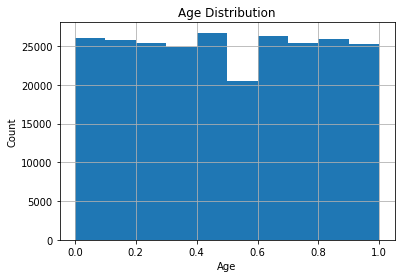

In [74]:
df.Age.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
marital_risk_count = risk_df['Married/Single'].value_counts()

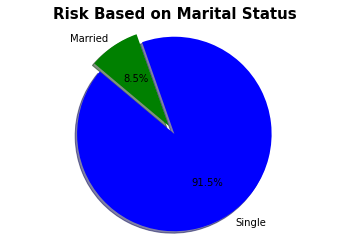

In [26]:
labels = 'Single','Married'
sizes = [215, 130]
colors = ['blue', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(marital_risk_count, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Risk Based on Marital Status', fontsize=15,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [10]:
house_ownership_risk_count = risk_df['House_Ownership'].value_counts()

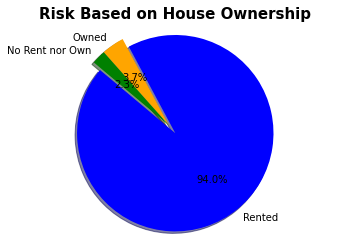

In [11]:
labels = 'Rented','Owned','No Rent nor Own'
sizes = [215, 130, 245]
colors = ['blue','orange','green']
explode = (0.1, 0,0)  # explode 1st slice

# Plot
plt.pie(house_ownership_risk_count, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Risk Based on House Ownership', fontsize=15,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [12]:
car_ownership_risk_count = risk_df['Car_Ownership'].value_counts()

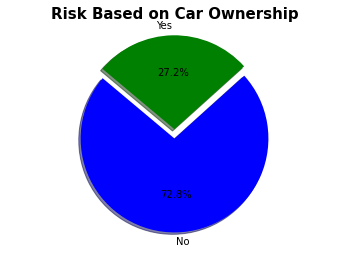

In [13]:
labels = 'No','Yes'
sizes = [215, 130]
colors = ['blue','green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(car_ownership_risk_count, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Risk Based on Car Ownership', fontsize=15,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [14]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [15]:
df.shape

(252000, 12)

Text(0, 0.5, 'Number of Customers')

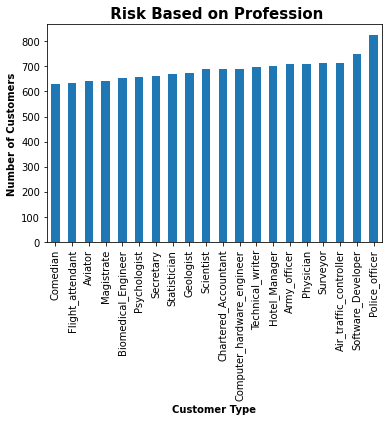

In [53]:
profession_risk_count = risk_df['Profession'].value_counts().sort_values(ascending=True).iloc[-20:]

profession_risk_count.plot(kind='bar')

plt.title(' Risk Based on Profession', fontsize=15, fontweight = 'bold')
plt.xlabel('Customer Type', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')

Text(0, 0.5, 'Number of Customers')

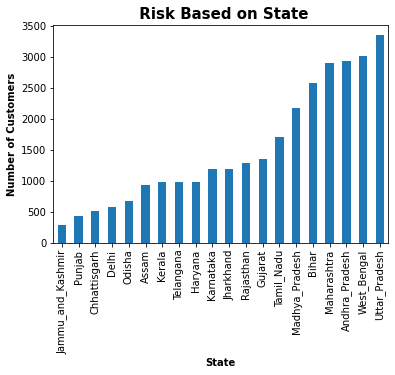

In [54]:
state_risk_count = risk_df['STATE'].value_counts().sort_values(ascending=True).iloc[-20:]

state_risk_count.plot(kind='bar')

plt.title(' Risk Based on State', fontsize=15, fontweight = 'bold')
plt.xlabel('State', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')

In [37]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Text(0, 0.5, 'Number of Customers')

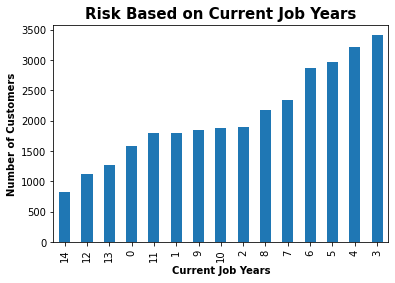

In [60]:
job_yrs_risk_count = risk_df['CURRENT_JOB_YRS'].value_counts().sort_values(ascending=True)

job_yrs_risk_count.plot(kind='bar')
plt.title('Risk Based on Current Job Years', fontsize=15, fontweight = 'bold')
plt.xlabel('Current Job Years', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')

Text(0, 0.5, 'Number of Customers')

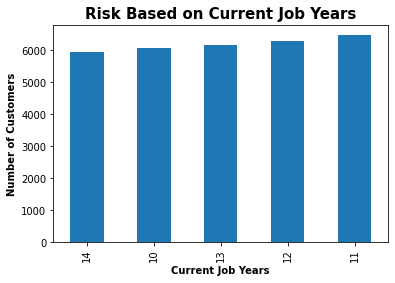

In [61]:
house_yrs_risk_count = risk_df['CURRENT_HOUSE_YRS'].value_counts().sort_values(ascending=True)

house_yrs_risk_count.plot(kind='bar')
plt.title('Risk Based on Current Job Years', fontsize=15, fontweight = 'bold')
plt.xlabel('Current Job Years', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')

### Use SMOTE to handle imbalance

In [62]:
def print_unique_col_values(data_frame):
    for column in df:
        if df[column].dtypes=='object': 
            print(f'{column} : {df[column].unique()}')

In [63]:
print_unique_col_values(df)

Married/Single : ['single' 'married']
House_Ownership : ['rented' 'norent_noown' 'owned']
Car_Ownership : ['no' 'yes']
Profession : ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
CITY : ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[

In [64]:
df['Married/Single'].replace({
    'single' : 0,
    'married' : 1
}, inplace=True)

In [65]:
df['Car_Ownership'].replace({
    'no' : 0,
    'yes' : 1
}, inplace=True)

In [66]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [67]:
col_to_scale = ['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

scaler = MinMaxScaler()

df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [68]:
df.sample(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
37781,9585696,0.362069,0.65,0,rented,1,Official,Anantapuram[24],Andhra_Pradesh,0.214286,0.50,0
236664,1179614,0.982759,0.40,0,rented,0,Computer_hardware_engineer,Surendranagar_Dudhrej,Gujarat,0.571429,0.75,0
221251,2767087,0.137931,0.70,1,rented,0,Drafter,Sagar,Madhya_Pradesh,0.500000,0.00,0
25466,6965955,0.810345,0.35,0,rented,0,Economist,Jalna,Maharashtra,0.500000,0.50,0
118088,7548739,0.982759,0.85,0,rented,1,Analyst,Barasat,West_Bengal,0.642857,0.75,0


In [69]:
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_owned,House_Ownership_rented,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1303834,0.034483,0.15,0,0,0.214286,0.75,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,0.327586,0.50,0,0,0.642857,0.75,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,0.775862,0.20,1,0,0.285714,0.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,0.344828,0.10,0,1,0.142857,0.50,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,0.448276,0.55,0,0,0.214286,1.00,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [70]:
X = df_new.drop('Risk_Flag', axis='columns')
y = df_new.Risk_Flag

In [71]:
y.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [73]:
y_sm.value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [75]:
y_test.value_counts()

1    44201
0    44201
Name: Risk_Flag, dtype: int64

### Train the model

In [54]:
model = RandomForestClassifier()

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
yp = model.predict(X_test)

In [57]:
y_test[:5]

177670    1
119801    0
402650    1
16577     0
233541    0
Name: Risk_Flag, dtype: int64

In [58]:
yp[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [59]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44201
           1       0.92      0.97      0.94     44201

    accuracy                           0.94     88402
   macro avg       0.94      0.94      0.94     88402
weighted avg       0.94      0.94      0.94     88402



Text(69.0, 0.5, 'Truth')

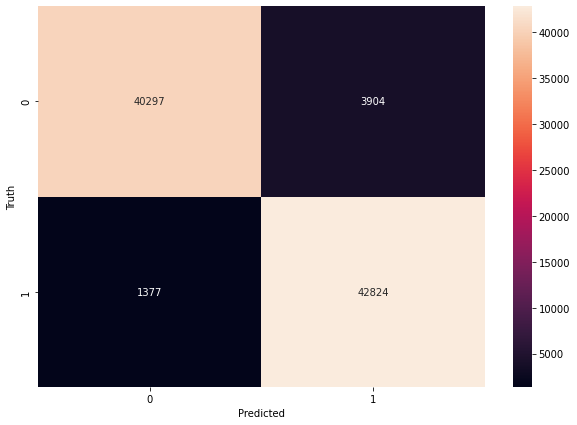

In [65]:
import seaborn as sn
cn = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Save model

In [25]:
import joblib

In [26]:
joblib.dump(model, 'loan_prediction_joblib')

['loan_prediction_joblib']

### Import Test data, clean and run predictions using saved model

In [27]:
df_td = pd.read_csv('test_data.csv')
df_td.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [31]:
df_td1 = df_td.drop({'ID'}, axis='columns')
df_td1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [32]:
df_test_dummies = pd.get_dummies(df_td1, drop_first=True)
df_test_dummies.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttar Pradesh[5],STATE_Uttarakhand,STATE_West Bengal
0,7393090,59,19,4,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1215004,25,5,5,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8901342,50,12,9,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1944421,49,9,3,12,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,13429,25,18,13,11,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


##### Make predictions

In [33]:
pr = joblib.load('loan_prediction_joblib')
test_pr = pr.predict(df_test_dummies)

In [34]:
df_td['Risk_Flag'] = test_pr
df_td.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0


In [35]:
df_td.to_csv('test_data_with_predicitons.csv')